In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

This is a statistical analyses on a company that gives loans out to individuals. This company does not use credit rating as a metric, and thereore the company wants an algorthm that correctly predicts the probability of someone defaulting on a loan given a set of key variables.

In [3]:
train = '/Users/bennicholl/Desktop/credit_default_risk/application_train.csv'

train = pd.read_csv(train)
"""gets all the training examples where our target == 1"""
target_is_one = train[train['TARGET'] == 1]
"""gets all the training examples where our target == 0"""
target_is_zero = train[train['TARGET'] == 0]

In [4]:
#below code checks precentages of delinquit males vs delinquit females

"""all of the males that could not pay back their loan"""
males_delinquit = target_is_one[target_is_one['CODE_GENDER'] == 'M']
"""all of the males that could pay back their loan"""
males_good = target_is_zero[target_is_zero['CODE_GENDER'] == 'M']
#P(delinquit | male) = 0.11 
percent_delinquit_males = len(males_delinquit)/len(males_good)

"""all of the females that could not pay back their loan"""
females_delinquit = target_is_one[target_is_one['CODE_GENDER'] == 'F']
"""all of the females that could pay back their loan"""
females_good = target_is_zero[target_is_zero['CODE_GENDER'] == 'F']
#P(delinquit | female) = 0.075
percent_delinquit_females = len(females_delinquit)/len(females_good)

probability of being delinquint if you are a male is:  11.286598025507393 %
probability of being delinquint if you are a female is:  7.526105014924739 %


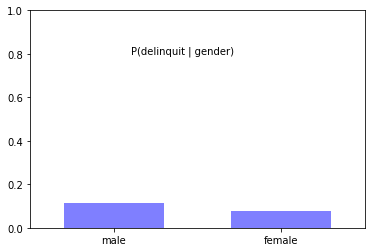

In [5]:
"""create plot"""
fig, ax = plt.subplots(1, 1)
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(0, 1)
"""creates bars for delinquent males"""
ax.vlines(0, 0, percent_delinquit_males, colors='b', lw=100, alpha=0.5)
"""creates bars for delinquent females"""
ax.vlines(1, 0, percent_delinquit_females, colors='b', lw=100, alpha=0.5)
"""allows only 0 x value for males and 1 x value for females"""
ax.set_xticks([0,1])
"""get the x_tick labels"""
ticks=ax.get_xticks().tolist()
"""change first tick to male"""
ticks[0] = 'male'
"""change second tick labels to female"""
ticks[1] = 'female'
"""set the newly appointed key/value tick pair"""
ax.set_xticklabels(ticks)
ax.annotate('P(delinquit | gender)', xy=[0.1,0.8])
print("probability of being delinquint if you are a male is: ", percent_delinquit_males * 100, '%')
print("probability of being delinquint if you are a female is: ", percent_delinquit_females * 100, '%')

As you can see, there is a 3.7% difference in the probability of being delinuint based off of gender. The next variables we'll take a look at is having a car vs not having a car

In [6]:
"""gets number of rows where target is one and target does not have a car"""
carless_delinquit = len(target_is_one[target_is_one['FLAG_OWN_CAR'] == 'N'])
# P(not having a car | your delinquit)  =  .695
delinquit_carless = carless_delinquit / len(target_is_one)


has_car_delinquit = len(target_is_one[target_is_one['FLAG_OWN_CAR'] == 'Y'])
# P(having car | your delinquit)  =  .305
delinquit_with_car = has_car_delinquit / len(target_is_one)


probability of not having a car given you are delinquint:  69.48237663645519 %
probability of having a car given you are delinquint:  30.517623363544814 %


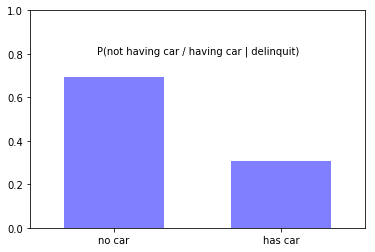

In [7]:
fig, ax = plt.subplots(1, 1)
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(0, 1)
"""creates bars for delinquint with no car"""
ax.vlines(0, 0, delinquit_carless, colors='b', lw=100, alpha=0.5)
"""creates bars for delinquent with car"""
ax.vlines(1, 0, delinquit_with_car, colors='b', lw=100, alpha=0.5)
"""allows only 0 x values for no car and 1 x value for owning a car"""
ax.set_xticks([0,1])
"""get the x_tick labels"""
ticks=ax.get_xticks().tolist()
"""change first tick to no car"""
ticks[0] = 'no car'
"""change second tick labels to has car"""
ticks[1] = 'has car'
"""set the newly appointed key/value tick pair"""
ax.set_xticklabels(ticks)
ax.annotate('P(not having car / having car | delinquit)', xy=[-0.1,0.8])
print('probability of not having a car given you are delinquint: ', delinquit_carless * 100, '%')
print('probability of having a car given you are delinquint: ', delinquit_with_car * 100, '%')



This is a huge differnece! this essintially tells us that in the world of delinquint loan payers, 69.5% of those individuals will not have a car, while only 31% will have a car!

probability of defaulting cash loan given you took out a cash loan is:  8.345912763449208 %
probability of defaulting revolving loan given you took out a revolving loan is:  5.478329177909082 %


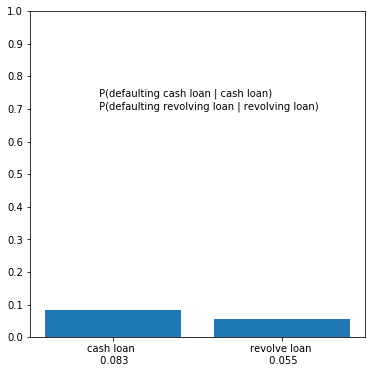

In [8]:
cash_loans = len(target_is_zero[target_is_zero['NAME_CONTRACT_TYPE'] == 'Cash loans'])
cash_loans_defaulted = len(target_is_one[target_is_one['NAME_CONTRACT_TYPE'] == 'Cash loans'])
#P(defaulting | cash loan)
probability_cash_loan = cash_loans_defaulted/(cash_loans + cash_loans_defaulted)


revolve_loans = len(target_is_zero[target_is_zero['NAME_CONTRACT_TYPE'] == 'Revolving loans'])
revolve_loans_defaulted = len(target_is_one[target_is_one['NAME_CONTRACT_TYPE'] == 'Revolving loans'])
#P(defaulting | revolving loan)
probability_revolve_loan = revolve_loans_defaulted/(revolve_loans + revolve_loans_defaulted)

fig = plt.figure(figsize=(6, 6))
loans = fig.add_subplot(111)
loans.set_ylim(0, 1)
loans.set_yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
loans.annotate(' P(defaulting cash loan | cash loan) \n P(defaulting revolving loan | revolving loan)', xy=[-0.1,0.7])

loans = plt.bar( [0, 1],[probability_cash_loan, probability_revolve_loan], 
                tick_label = ['cash loan \n {}'.format(round(probability_cash_loan, 3)) , 'revolve loan \n {}'.format(round(probability_revolve_loan, 3)) ])

print("probability of defaulting cash loan given you took out a cash loan is: ", probability_cash_loan * 100, "%")
print("probability of defaulting revolving loan given you took out a revolving loan is: ", probability_revolve_loan * 100, "%")

This difference in percentages was expected. Taking out a full cash loan as oppsed to a loan where you are receving the money periodically is going to be an increase in risk for the lender. 

probability of being delinquint if you own reality:  7.961577407740775 %
probability of being delinquint if you do not own reality:  8.324929139375152 %


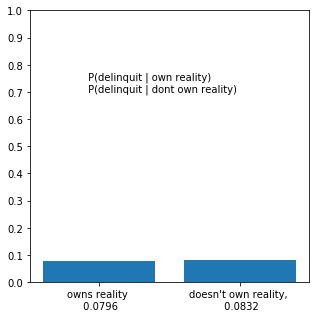

In [9]:
owns_reality = len(target_is_zero[target_is_zero['FLAG_OWN_REALTY'] == 'Y'])
owns_reality_delinquint = len(target_is_one[target_is_one['FLAG_OWN_REALTY'] == 'Y'])
#P(delinquit | own reality)
delinquint_owners = owns_reality_delinquint / (owns_reality_delinquint + owns_reality)

not_own_reality = len(target_is_zero[target_is_zero['FLAG_OWN_REALTY'] == 'N'])
not_own_reality_delinquit = len(target_is_one[target_is_one['FLAG_OWN_REALTY'] == 'N'])
#P(delinquit | dont own reality)
not_delinquit_owners = not_own_reality_delinquit / (not_own_reality_delinquit + not_own_reality)

print("probability of being delinquint if you own reality: ", delinquint_owners * 100, "%")
print("probability of being delinquint if you do not own reality: ", not_delinquit_owners * 100, "%")
fig = plt.figure(figsize=(5, 5))
loans = fig.add_subplot(111)
loans.set_ylim(0, 1)
loans.set_yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
loans.annotate(' P(delinquit | own reality) \n P(delinquit | dont own reality)', xy=[-0.1,0.7])

loans = plt.bar( [0, 1],[delinquint_owners, not_delinquit_owners], 
                tick_label = ['owns reality \n {}'.format(round(delinquint_owners, 4)) , "doesn't own reality, \n {}".format(round(not_delinquit_owners, 4)) ])

There is only a 0.63% difference between home owners and non home owners in whether or not they beceome delinquint in payments or not. 

year not delinquint 1.8891994182327803
year delinquint 2.0287829347879023
quarter not delinquint 0.26593850704190924
quarter delinquint 0.259923050698875
month not delinquint 0.2706969392036959
month delinquint 0.22792577801587688
weekly not delinquint 0.03431530316672031
weekly delinquint 0.03491939804217601
daily not delinquint 0.00691357823506166
daily delinquint 0.008035844737739248
hourly not delinquint 0.006379884216916063
hourly delinquint 0.0066721862367895585


Text(2,2,'blue: individuals who are not delinquint in paying back loan \ngreen: individuals who are delinquint in paying back loan')

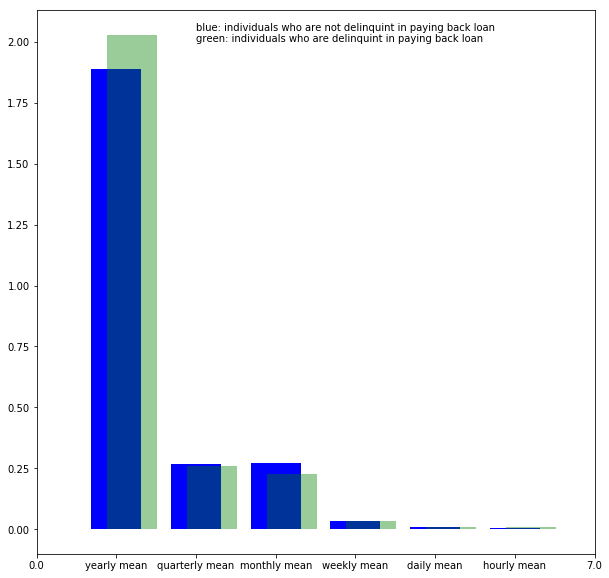

In [10]:
yearly_credit = train['AMT_REQ_CREDIT_BUREAU_YEAR']
"""not delinquint list"""
yearly_credit_zero = target_is_zero['AMT_REQ_CREDIT_BUREAU_YEAR']
"""delinquint list"""
yearly_credit_one = target_is_one['AMT_REQ_CREDIT_BUREAU_YEAR']


"""theese nan probabilities are the same for all of the credit credit inquiries"""
#P(value is nan | individual defaulted)
yearly_nan_default = len([i for i in yearly_credit_one if np.isnan(i) == True]) / len(yearly_credit_one)
#P(value is nan | individual did not default)
yearly_nan_no_default = len([i for i in yearly_credit_zero if np.isnan(i) == True]) / len(yearly_credit_zero)


"""not delinquint list"""
quarter_credit_zero = target_is_zero['AMT_REQ_CREDIT_BUREAU_QRT']
"""delinquint list"""
quarter_credit_one = target_is_one['AMT_REQ_CREDIT_BUREAU_QRT']


"""not delinquint list"""
monthly_credit_zero = target_is_zero['AMT_REQ_CREDIT_BUREAU_MON']
"""delinquint list"""
monthly_credit_one = target_is_one['AMT_REQ_CREDIT_BUREAU_MON']

"""not delinquint list"""
weekly_credit_zero = target_is_zero['AMT_REQ_CREDIT_BUREAU_WEEK']
"""delinquint list"""
weekly_credit_one = target_is_one['AMT_REQ_CREDIT_BUREAU_WEEK']

"""not delinquint list"""
daily_credit_zero = target_is_zero['AMT_REQ_CREDIT_BUREAU_DAY']
"""delinquint list"""
daily_credit_one = target_is_one['AMT_REQ_CREDIT_BUREAU_DAY']


"""not delinquint list"""
hourly_credit_zero = target_is_zero['AMT_REQ_CREDIT_BUREAU_HOUR']
"""delinquint list"""
hourly_credit_one = target_is_one['AMT_REQ_CREDIT_BUREAU_HOUR']


print('year not delinquint', yearly_credit_zero.mean())
print('year delinquint', yearly_credit_one.mean())

print('quarter not delinquint', quarter_credit_zero.mean())
print('quarter delinquint', quarter_credit_one.mean())

print('month not delinquint', monthly_credit_zero.mean())
print('month delinquint', monthly_credit_one.mean())

print('weekly not delinquint', weekly_credit_zero.mean())
print('weekly delinquint', weekly_credit_one.mean())

print('daily not delinquint', daily_credit_zero.mean())
print('daily delinquint', daily_credit_one.mean())    

print('hourly not delinquint', hourly_credit_zero.mean())
print('hourly delinquint', hourly_credit_one.mean())   

fig = plt.figure(figsize=(10, 10))
credit = fig.add_subplot(111)

credit.set_xlim(0.0, 7.0)

credit.vlines(1.0, 0, yearly_credit_zero.mean(), colors='b', lw=50, alpha=1)
credit.vlines(1.2, 0, yearly_credit_one.mean(), colors='g', lw=50, alpha=0.4)

credit.vlines(2, 0, quarter_credit_zero.mean(), colors='b', lw=50, alpha=1)
credit.vlines(2.2, 0, quarter_credit_one.mean(), colors='g', lw=50, alpha=0.4)

credit.vlines(3, 0, monthly_credit_zero.mean(), colors='b', lw=50, alpha=1)
credit.vlines(3.2, 0, monthly_credit_one.mean(), colors='g', lw=50, alpha=0.4)

credit.vlines(4, 0, weekly_credit_zero.mean(), colors='b', lw=50, alpha=1)
credit.vlines(4.2, 0, weekly_credit_one.mean(), colors='g', lw=50, alpha=0.4)

credit.vlines(5, 0, daily_credit_zero.mean(), colors='b', lw=50, alpha=1)
credit.vlines(5.2, 0, daily_credit_one.mean(), colors='g', lw=50, alpha=0.4)

credit.vlines(6, 0, hourly_credit_zero.mean(), colors='b', lw=50, alpha=1)
credit.vlines(6.2, 0, hourly_credit_one.mean(), colors='g', lw=50, alpha=0.4)

ticks=credit.get_xticks().tolist()
ticks[1],ticks[2],ticks[3],ticks[4],ticks[5],ticks[6] = ['yearly mean', 'quarterly mean', 'monthly mean', 'weekly mean', 'daily mean', 'hourly mean']
"""set the newly appointed x values"""
credit.set_xticklabels(ticks)

credit.annotate("blue: individuals who are not delinquint in paying back loan \ngreen: individuals who are delinquint in paying back loan", 
                xy = [2,2])

The above bar chart shows the mean value of credit inquiries per year, quarter, month, etc.
The purposre for this is to try and understand if there is any coorelation between people becomoing delinquint on a loan, and the amount of loans(because that triggers a credit inquiry) they apply for. 
As you can see from the chart, the average amount of credit inquires is slightly higher for delinquint customers in the yearly credit inquiries, but the oppsoite is true for quarterly and monthly. The difference in weekly, daily and hourly credit inquiries averages are also minimal. Therefore, I conlclude this vairable to be of minimal importance. If I include this in the neural net, I'll proablle either just use the yearly credit inquires mean since there is more information, or run a PCA on all the variables.

average income is: $ 166035


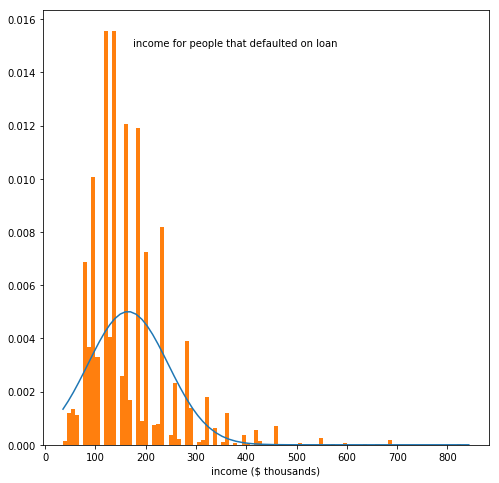

average income is: $ 174180


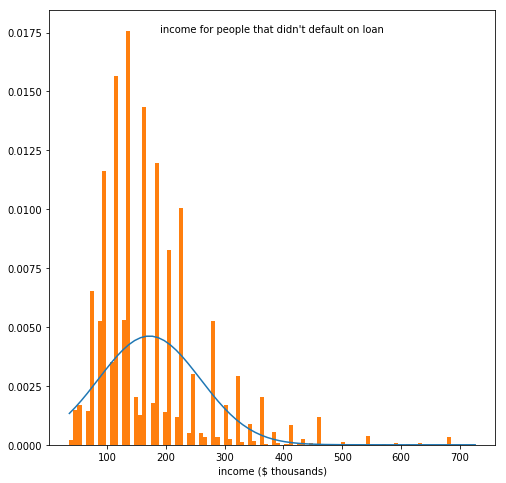

In [11]:
income_for_defaults = target_is_one['AMT_INCOME_TOTAL']
income_for_defaults = np.sort(income_for_defaults)

list_of_frequencies = []
cooresponding_income = []

frequency_count = 0
"""count until our minumum integer + 10000"""
count_until = income_for_defaults.min() + 10000
for e,i in enumerate(income_for_defaults):
    if i < count_until:
        frequency_count += 1
    else:
        cooresponding_income.append(count_until)
        list_of_frequencies.append(frequency_count)
        """now count until our current integer + 10000"""
        count_until = i + 10000
        frequency_count = 1
        """if our iteration is our last element"""
    if e+1 == len(income_for_defaults):    
        cooresponding_income.append(count_until)
        list_of_frequencies.append(frequency_count)

scaled_cooresponding_income = (np.array(cooresponding_income) * .001).tolist()

new_li = []
for e,i in enumerate(scaled_cooresponding_income):
    new_li.append( [i] * list_of_frequencies[e] )
scaled_cooresponding_income = [ii for i in new_li for ii in i]
del(scaled_cooresponding_income[-1])


fit = stats.norm.pdf(scaled_cooresponding_income[:24800], np.mean(scaled_cooresponding_income[:24800]), np.std(scaled_cooresponding_income[:24800]))
plt.figure(figsize=(8, 8))
plt.plot(scaled_cooresponding_income[:24800], fit)


plt.annotate("income for people that defaulted on loan", xy=[175,0.015])
plt.xlabel('income ($ thousands)')
plt.hist(scaled_cooresponding_income[:24800], 100, density = True)
print('average income is: $', int(np.mean(scaled_cooresponding_income) * 1000))
plt.show()


income_for_non_defaults = target_is_zero['AMT_INCOME_TOTAL']
income_for_non_defaults = np.sort(income_for_non_defaults)

list_of_frequencies = []
cooresponding_income = []

frequency_count = 0
"""count until our minumum integer + 10000"""
count_until = income_for_non_defaults.min() + 10000
for e,i in enumerate(income_for_non_defaults):
    if i < count_until:
        frequency_count += 1
    else:
        cooresponding_income.append(count_until)
        list_of_frequencies.append(frequency_count)
        """now count until our current integer + 10000"""
        count_until = i + 10000
        frequency_count = 1
        """if our iteration is our last element"""
    if e+1 == len(income_for_non_defaults):    
        cooresponding_income.append(count_until)
        list_of_frequencies.append(frequency_count)


scaled_cooresponding_income = (np.array(cooresponding_income) * .001).tolist()

new_li = []
for e,i in enumerate(scaled_cooresponding_income):
    new_li.append( [i] * list_of_frequencies[e] )
scaled_cooresponding_income = [ii for i in new_li for ii in i]
del(scaled_cooresponding_income[-1])


fit = stats.norm.pdf(scaled_cooresponding_income[:282000], np.mean(scaled_cooresponding_income[:282000]), np.std(scaled_cooresponding_income[:282000]))
plt.figure(figsize=(8, 8))
plt.plot(scaled_cooresponding_income[:282000], fit)

plt.hist(scaled_cooresponding_income[:282000], 100, density = True)
plt.annotate("income for people that didn't default on loan", xy=[190,0.0175])
plt.xlabel('income ($ thousands)')
print('average income is: $', int(np.mean(scaled_cooresponding_income) * 1000))
plt.show()

The distributions of individuals that defaulted on a loas vs the individuals that did not default on a loan are somewhat similiar. It is also worth noting that the means of the distribution are only $8,145 dollars apart. This must be due to the fact that the credit lenders are already taking into account various statistical measurues when allocating their loans to individuals. In hindsight, I think it makes sense that their is minimal diference in distributions between delinquint lendee's and non delinquint lendee's. Lets check out the distributions associated with the amount of credit lines individuals are recieveing, and the distributions with respect to delinquint and non delinquint lendee's

average credit line for people that defaulted on loan: 510.523911376
average credit line for people that didn't default on loan: 539.198784163


Text(0.5,0,'credit line ($ thousands)')

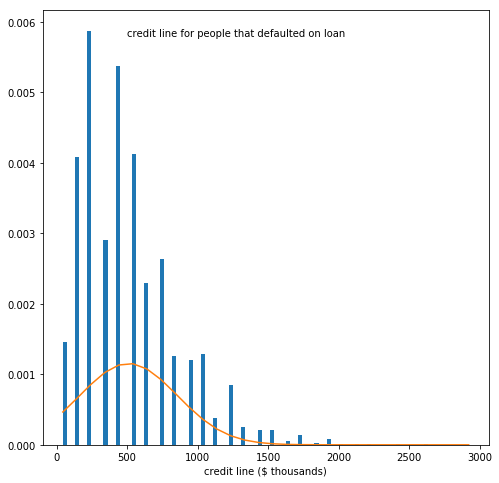

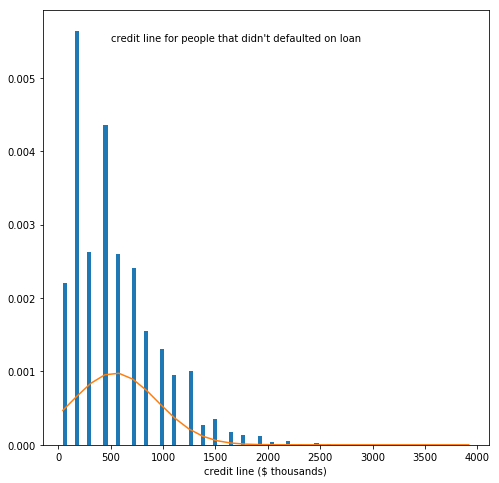

In [12]:
delinquint_credit_amount = np.sort(np.array(target_is_one['AMT_CREDIT']))
"""get rid of last element becuase it is an outlier and it dicks up the histogram"""
delinquint_credit_amount = delinquint_credit_amount[:-1]

"""scale and calculate bins for histogram"""
delinquint = np.histogram((delinquint_credit_amount * .001), bins = 30)

"""numpy.hist has an extra element in the value array because the count array counts from the 
first to the second number in value array, so we delete the last element here"""
remove_last_element = np.delete(delinquint[1],-1)

new_li = []
for e,i in enumerate(remove_last_element):
    new_li.append( [i] * delinquint[0][e])
scaled_cooresponding_credit = [ii for i in new_li for ii in i]

fig = plt.figure(figsize=(8, 8))
delinquint_credit_loan = fig.add_subplot(111)

print("average credit line for people that defaulted on loan:", np.mean(scaled_cooresponding_credit))

"""creates histograms"""
delinquint_credit_loan.hist(scaled_cooresponding_credit, 100, density = True)
"""gets y values for normal distribution"""
fit_delinquint = stats.norm.pdf(scaled_cooresponding_credit, np.mean(scaled_cooresponding_credit), np.std(scaled_cooresponding_credit))
"""plots normal distribution"""
delinquint_credit_loan.plot(scaled_cooresponding_credit, fit_delinquint)

delinquint_credit_loan.annotate("credit line for people that defaulted on loan", xy=[500,0.0058])
delinquint_credit_loan.set_xlabel('credit line ($ thousands)')



not_delinquint_credit_amount = np.sort(np.array(target_is_zero['AMT_CREDIT']))
not_delinquint = np.histogram((not_delinquint_credit_amount * .001), bins = 30)

"""numpy.hist has an extra element in the value array because the count array counts from the 
first to the second number in value array, so we delete the last element here"""
remove_last_element = np.delete(not_delinquint[1],-1)

new_li = []
for e,i in enumerate(remove_last_element):
    new_li.append( [i] * not_delinquint[0][e])
scaled_cooresponding_credit = [ii for i in new_li for ii in i]

fig_two = plt.figure(figsize=(8, 8))
not_delinquint_credit_loan = fig_two.add_subplot(111)

print("average credit line for people that didn't default on loan:", np.mean(scaled_cooresponding_credit))

"""creates histograms"""
not_delinquint_credit_loan.hist(scaled_cooresponding_credit, 100, density = True)
"""gets y values for normal distribution"""
fit_not_delinquint = stats.norm.pdf(scaled_cooresponding_credit, np.mean(scaled_cooresponding_credit), np.std(scaled_cooresponding_credit))
"""plots normal distribution"""
not_delinquint_credit_loan.plot(scaled_cooresponding_credit, fit_not_delinquint)

not_delinquint_credit_loan.annotate("credit line for people that didn't defaulted on loan", xy=[500,0.0055])
not_delinquint_credit_loan.set_xlabel('credit line ($ thousands)')

From looking at the two charts we see not only the increased average for people that didn't default on the loan, but also the increase in people with loans excedding $200,000, which seems to be the main reason for the increased average. It seems as though the bigger the credit line, the less likely individuals are to default on loans. This probally has something to do with the current statistical paramters the credit lenders algorithm uses. It generally will give bigger loans to individuals who are less liky to defualt, and their statisitcal parameters obviously seem to be working, at least somewhat. 

average annuity loan for people that defaulted on loan: 23.9079137221
average annuity loan for people that didn't default on loan: 22.7923907186


[Text(0,0,'-20'),
 Text(0,0,'0'),
 Text(0,0,'20'),
 Text(0,0,'40'),
 Text(0,0,'60'),
 Text(0,0,'80'),
 Text(0,0,'100'),
 Text(0,0,'120')]

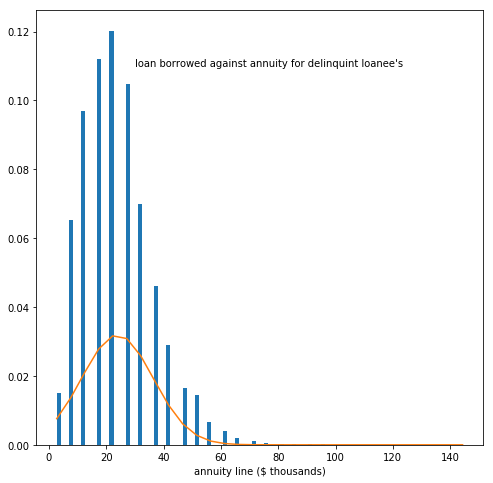

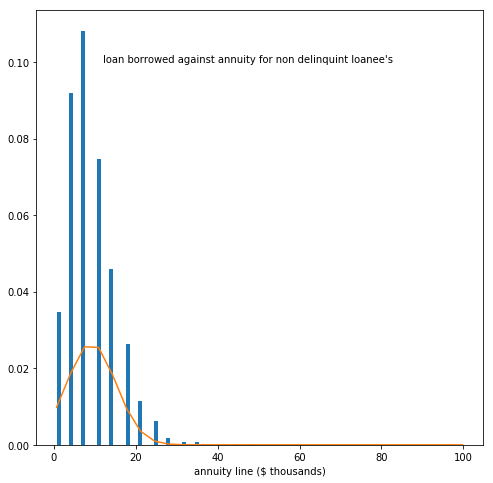

In [22]:
delinquint_annuity_amount = np.sort(np.array(target_is_one['AMT_ANNUITY']))

"""scale and calculate bins for histogram"""
delinquint = np.histogram((delinquint_annuity_amount * .001), bins = 30)

"""numpy.hist has an extra element in the value array because the count array counts from the 
first to the second number in value array, so we delete the last element here"""
remove_last_element = np.delete(delinquint[1],-1)

new_li = []
for e,i in enumerate(remove_last_element):
    new_li.append( [i] * delinquint[0][e])
scaled_cooresponding_credit = [ii for i in new_li for ii in i]

fig = plt.figure(figsize=(8, 8))
delinquint_annuity_loan = fig.add_subplot(111)

print("average annuity loan for people that defaulted on loan:", np.mean(scaled_cooresponding_credit))

"""creates histograms"""
delinquint_annuity_loan.hist(scaled_cooresponding_credit, 100, density = True)
"""gets y values for normal distribution"""
fit_delinquint = stats.norm.pdf(scaled_cooresponding_credit, np.mean(scaled_cooresponding_credit), np.std(scaled_cooresponding_credit))
"""plots normal distribution"""
delinquint_annuity_loan.plot(scaled_cooresponding_credit, fit_delinquint)

delinquint_annuity_loan.annotate("loan borrowed against annuity for delinquint loanee's", xy=[30,0.11])
delinquint_annuity_loan.set_xlabel('annuity line ($ thousands)')
ticks = delinquint_annuity_loan.get_xticks().tolist()
ticks = [int(i) for i in ticks]


not_delinquint_annuity_amount = np.sort(np.array(target_is_zero['AMT_ANNUITY']))
not_delinquint_annuity_amount = not_delinquint_annuity_amount[~np.isnan(not_delinquint_annuity_amount)]
not_delinquint = np.histogram((not_delinquint_annuity_amount * .001), bins = 30)

"""numpy.hist has an extra element in the value array because the count array counts from the 
first to the second number in value array, so we delete the last element here"""
remove_last_element = np.delete(not_delinquint[1],-1)

new_li = []
for e,i in enumerate(remove_last_element):
    new_li.append( [i] * not_delinquint[0][e])
scaled_cooresponding_credit = [ii for i in new_li for ii in i]

fig_two = plt.figure(figsize=(8, 8))
not_delinquint_annuity_loan = fig_two.add_subplot(111)

print("average annuity loan for people that didn't default on loan:", np.mean(scaled_cooresponding_credit))

"""creates histograms"""
not_delinquint_annuity_loan.hist(scaled_cooresponding_credit, 100, density = True)
"""gets y values for normal distribution"""
fit_not_delinquint = stats.norm.pdf(scaled_cooresponding_credit, np.mean(scaled_cooresponding_credit), np.std(scaled_cooresponding_credit))
"""plots normal distribution"""
not_delinquint_annuity_loan.plot(scaled_cooresponding_credit, fit_not_delinquint)

not_delinquint_annuity_loan.annotate("loan borrowed against annuity for non delinquint loanee's", xy=[30,0.10])
not_delinquint_annuity_loan.set_xlabel('annuity line ($ thousands)')
not_delinquint_annuity_loan.set_xticklabels(ticks)


Notice how these figures seem to be opposite of the credit line and price of good distributions, where this average increases just over 1% for loans for where the loanee's are delinquint. The parameters associated with taking out a loan on your own annuity are obviously nowhere near as strict as taking out a credit loan where the bank is giving you money. The lendee is not taking any real risk if you default on your own annuity, therefore, as said before, the requirements are easier which is the reason why the average amount in dollars is slightly more for delinquint loanee's then it is for non delinquint loanee's. 

average price of good loan was taken out for, for people that defaulted: 434.998004354
average price of good loan was taken out for, for people that didn't default: 483.94198241


Text(0.5,0,'price($ thousands)')

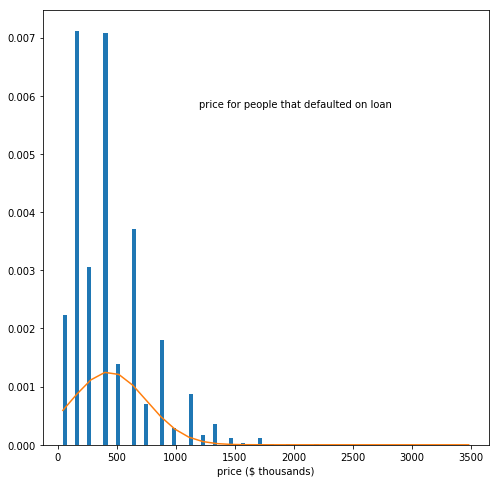

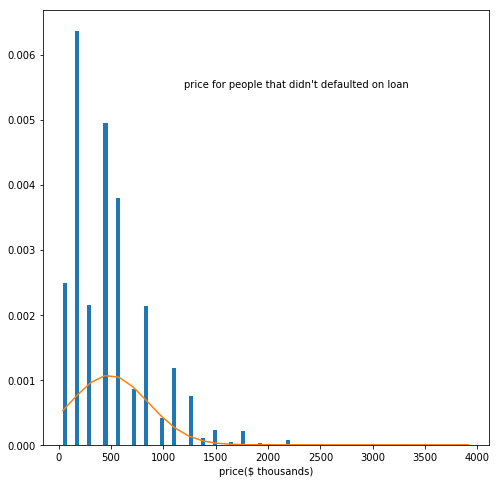

In [20]:
delinquint_price = np.sort(np.array(target_is_one['AMT_GOODS_PRICE']))
delinquint_price = delinquint_price [~np.isnan(delinquint_price )]
"""scale and calculate bins for histogram"""
delinquint = np.histogram((delinquint_price * .001), bins = 30)

"""numpy.hist has an extra element in the value array because the count array counts from the 
first to the second number in value array, so we delete the last element here"""
remove_last_element = np.delete(delinquint[1],-1)

new_li = []
for e,i in enumerate(remove_last_element):
    new_li.append( [i] * delinquint[0][e])
scaled_cooresponding_price = [ii for i in new_li for ii in i]

fig = plt.figure(figsize=(8, 8))
delinquint_price = fig.add_subplot(111)

print("average price of good loan was taken out for, for people that defaulted:", np.mean(scaled_cooresponding_price))

"""creates histograms"""
delinquint_price.hist(scaled_cooresponding_price, 100, density = True)
"""gets y values for normal distribution"""
fit_delinquint = stats.norm.pdf(scaled_cooresponding_price, np.mean(scaled_cooresponding_price), np.std(scaled_cooresponding_price))
"""plots normal distribution"""
delinquint_price.plot(scaled_cooresponding_price, fit_delinquint)

delinquint_price.annotate("price for people that defaulted on loan", xy=[1200,0.0058])
delinquint_price.set_xlabel('price ($ thousands)')




not_delinquint_price = np.sort(np.array(target_is_zero['AMT_GOODS_PRICE']))
not_delinquint_price = not_delinquint_price[~np.isnan(not_delinquint_price)]
"""scale and calculate bins for histogram"""
not_delinquint = np.histogram((not_delinquint_price  * .001), bins = 30)

"""numpy.hist has an extra element in the value array because the count array counts from the 
first to the second number in value array, so we delete the last element here"""
remove_last_element = np.delete(not_delinquint[1],-1)

new_li = []
for e,i in enumerate(remove_last_element):
    new_li.append( [i] * not_delinquint[0][e])
scaled_cooresponding_price = [ii for i in new_li for ii in i]

fig_two = plt.figure(figsize=(8, 8))
not_delinquint_price = fig_two.add_subplot(111)

print("average price of good loan was taken out for, for people that didn't default:", np.mean(scaled_cooresponding_price))

"""creates histograms"""
not_delinquint_price.hist(scaled_cooresponding_price, 100, density = True)
"""gets y values for normal distribution"""
fit_not_delinquint = stats.norm.pdf(scaled_cooresponding_price, np.mean(scaled_cooresponding_price), np.std(scaled_cooresponding_price))
"""plots normal distribution"""
not_delinquint_price.plot(scaled_cooresponding_price, fit_not_delinquint)

not_delinquint_price.annotate("price for people that didn't defaulted on loan", xy=[1200,0.0055])
not_delinquint_price.set_xlabel('price($ thousands)')

The output were getting here is very similiar to the output associated with credit loans amount for obvious reasons. 